# Mass

In [1]:
using DSP  # for unwrap
using Interpolations
using LaTeXStrings
using Printf
using Plots, Measures
theme(:wong2)
include("../Utils/misc-tsv.jl")
include("../Utils/misc-tool.jl")

Main.MiscTool

## Irreducible mass

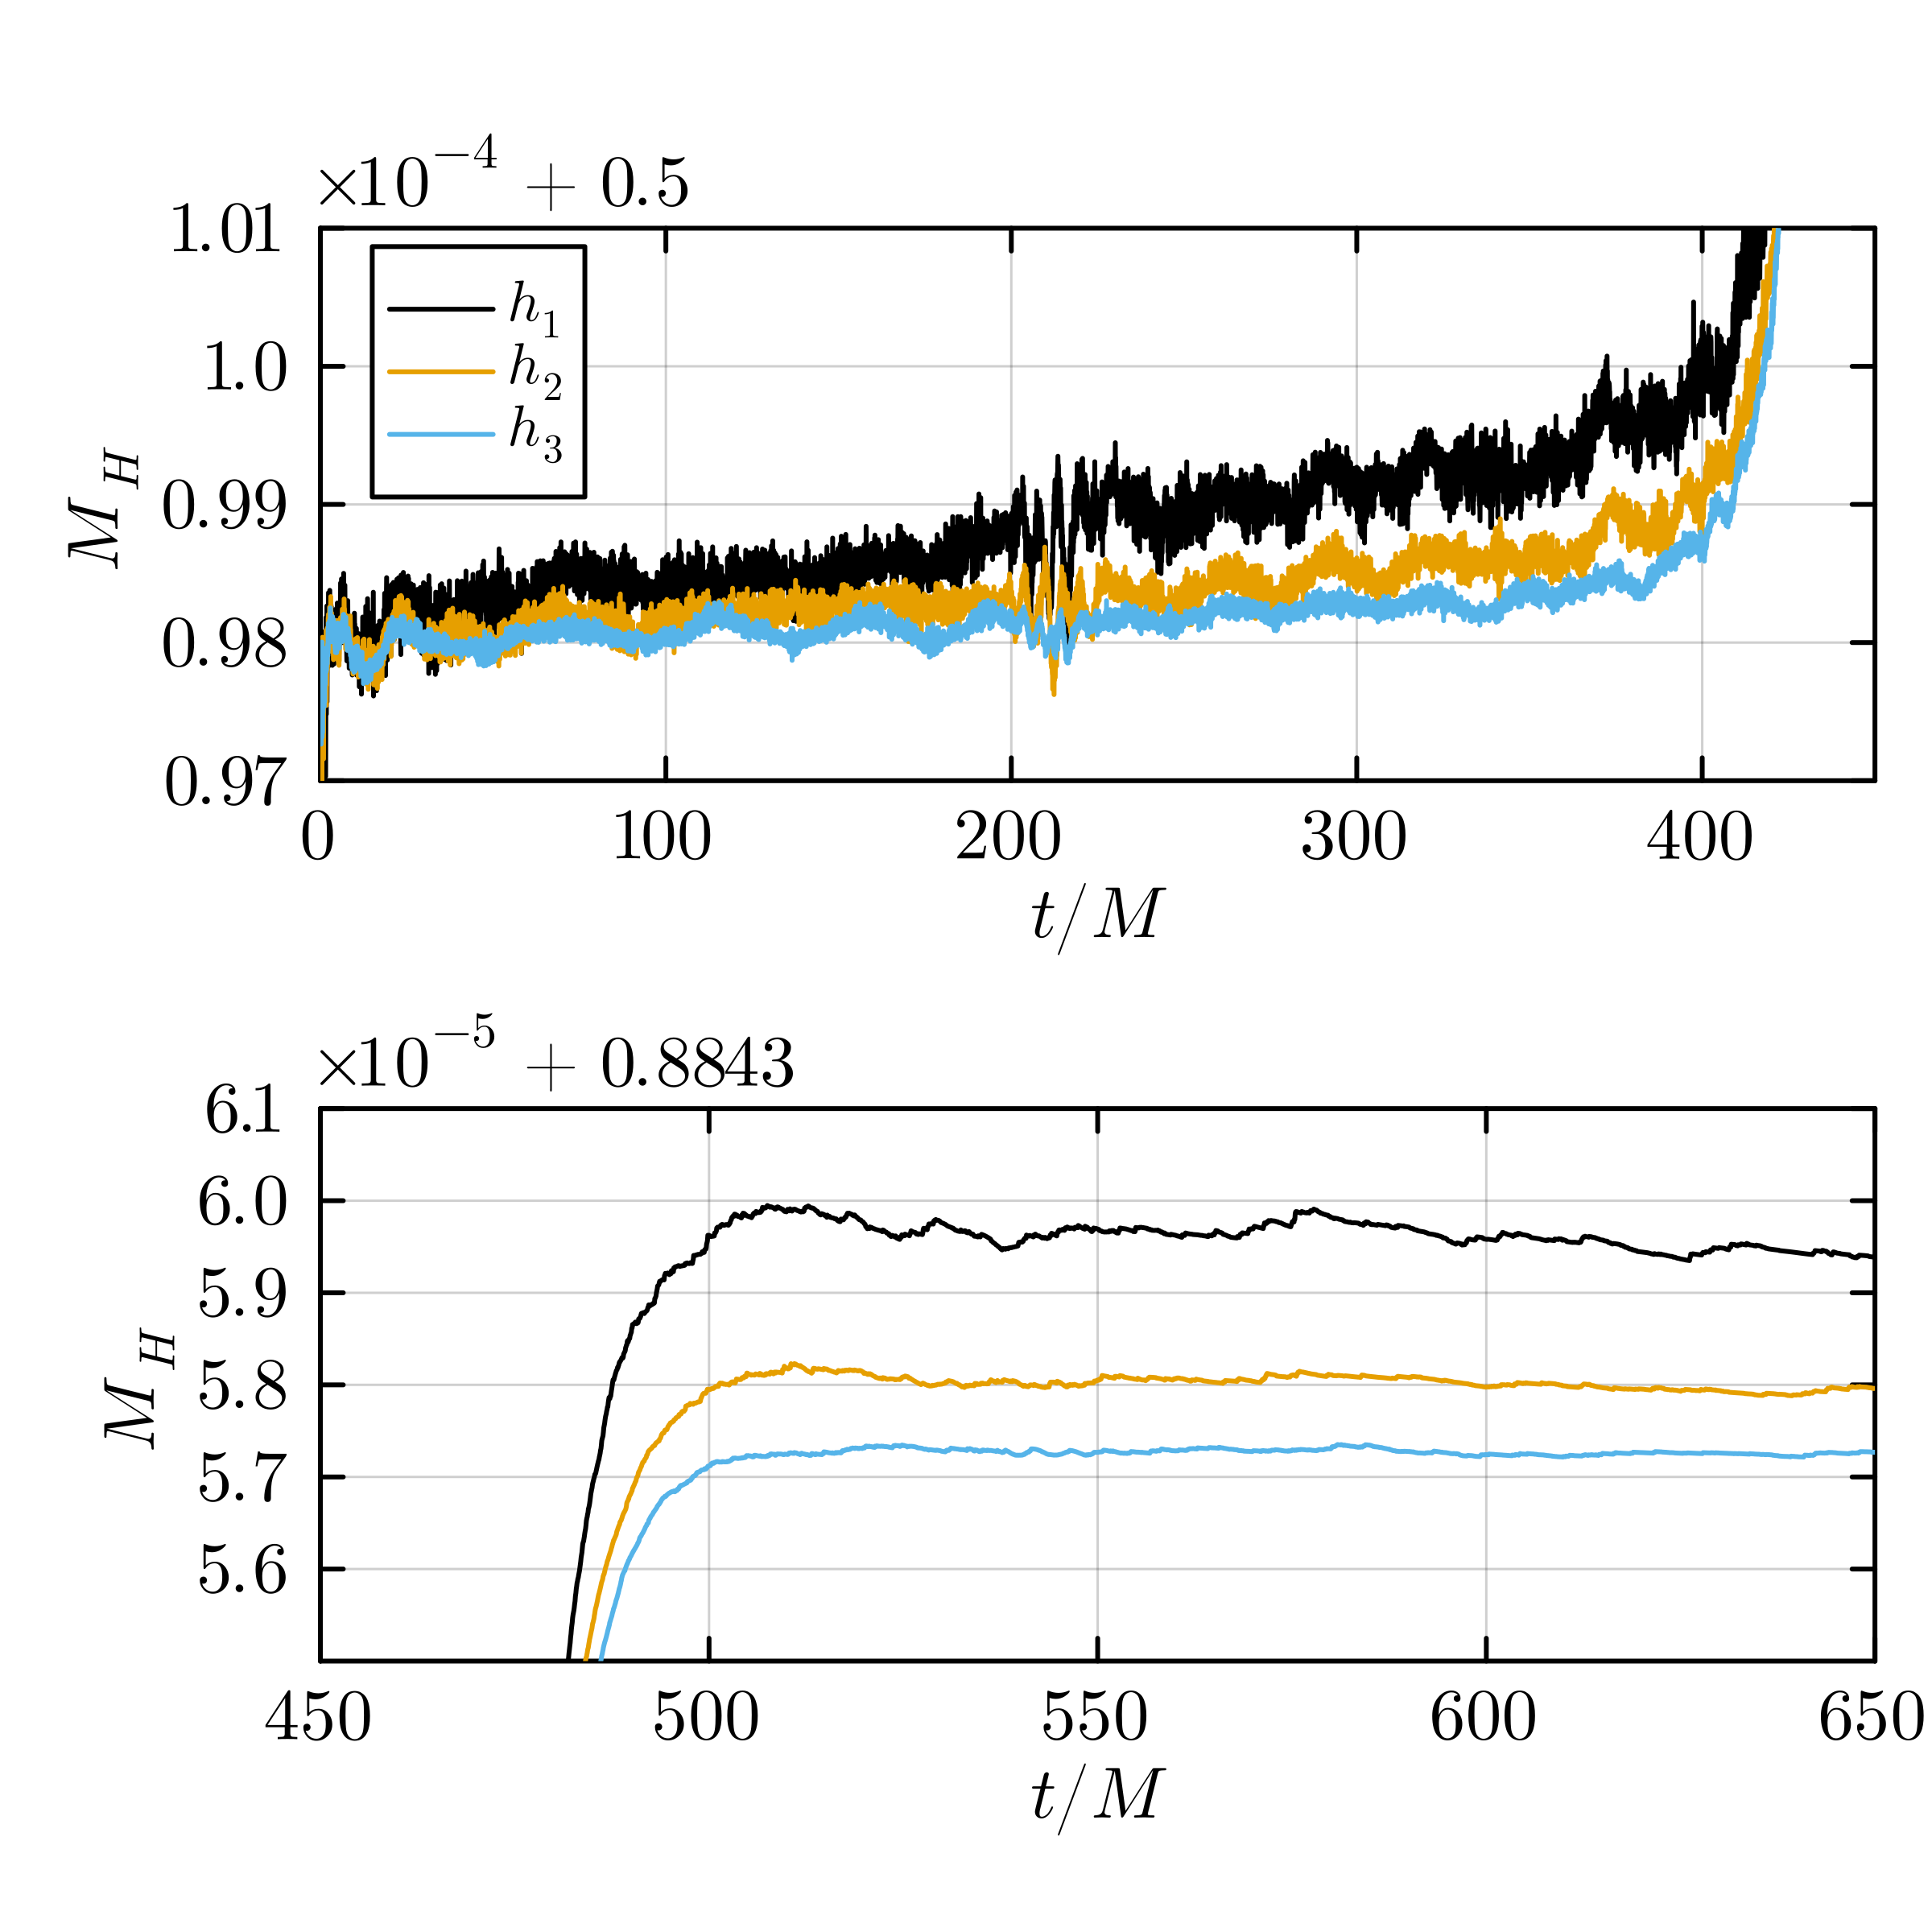

In [10]:
let dirsZ, dirsL, fZ_A, fL_A, fZ_phi, fL_phi
    dirsZ = [
        ("q1-Z4cow-low/Sum/BH_diagnostics.ah1.gp", "low"),
        ("q1-Z4cow-low/Sum/BH_diagnostics.ah2.gp", "low"),
        ("q1-Z4cow-low/Sum/BH_diagnostics.ah3.gp", "low"),
        ("q1-Z4cow-med/Sum/BH_diagnostics.ah1.gp", "med"),
        ("q1-Z4cow-med/Sum/BH_diagnostics.ah2.gp", "med"),
        ("q1-Z4cow-med/Sum/BH_diagnostics.ah3.gp", "med"),
        ("q1-Z4cow-high/Sum/BH_diagnostics.ah1.gp", "high"),
        ("q1-Z4cow-high/Sum/BH_diagnostics.ah2.gp", "high"),
        ("q1-Z4cow-high/Sum/BH_diagnostics.ah3.gp", "high"),
    ]
    (datsZ, _) = MiscTSV.load_data_0d(dirsZ; cols=[2, 27], parent_dir="../../data/q1")
    labsZ = [L"h_1", L"h_2", L"h_3"]
    
    # Plot1
    p1 = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
    xs = 0:100:400
    xticks!(p1, xs, [L"%$(n)" for n in xs])
    for i in 1:3
        idx = (i-1)*3 + 1
        d = datsZ[idx]
        p1 = plot!(d[1], d[2].-0.5, label=labsZ[i])
    end
    p1 = plot!(xlabel=L"t/M", ylabel=L"M_H", xlim=(0,450), ylim=(9.7e-5,1.01e-4), framestyle=:box)
    p1 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e4, digits=2))"), topmargin=1cm)
    p1 = annotate!(0, 1.01e-4*1.004, Plots.text(L"\times10^{-4}+0.5", 10, :black, :left))
    
    # Plot3
    p3 = plot(titlefontsize=10, guidefontsize=10, tickfontsize=10, legendfontsize=8)
    xs = 450:50:650
    xticks!(p3, xs, [L"%$(n)" for n in xs])
    for i in 1:3
        idx = (i-1)*3 + 3
        d = datsZ[idx]
        p3 = plot!(d[1], d[2].-0.8843, label="")
    end
    p3 = plot!(xlabel=L"t/M", ylabel=L"M_H", xlim=(450,650), ylim=(5.5e-5,6.1e-5), framestyle=:box)
    p3 = plot!(yaxis=(formatter=(f)->L"%$(round(f * 1e5, digits=1))"))
    p3 = annotate!(450, (6.1e-5)*1.01, Plots.text(L"\times10^{-5}+0.8843", 10, :black, :left))
    
    plt = plot(p1, p3, layout=(2,1), size=(400, 400), dpi=600)
    # savefig(plt, "Mass.pdf")
    display(plt)
end